In [18]:
#--->importing req libraries
try:
    import tensorflow as tf
    import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from keras import layers , metrics , losses
    from keras.models import Sequential
    from sklearn.model_selection import train_test_split
    from keras.models import Sequential
    from tensorflow.keras import optimizers
    from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D,ActivityRegularization
    from keras.callbacks import EarlyStopping
    from keras.layers.embeddings import Embedding
    from keras.preprocessing import sequence
    import nltk
    print("Library Loaded Successfully ..........")
except:
    print("Library not Found ! ")
    


Library Loaded Successfully ..........


# Insights and Data Distribution 

In [19]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from tensorflow.keras.datasets import imdb
import re

(train_data, _), (_, _) = imdb.load_data()
word_index = imdb.get_word_index() #[("great",7),("good",12)] ---> key-value               
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

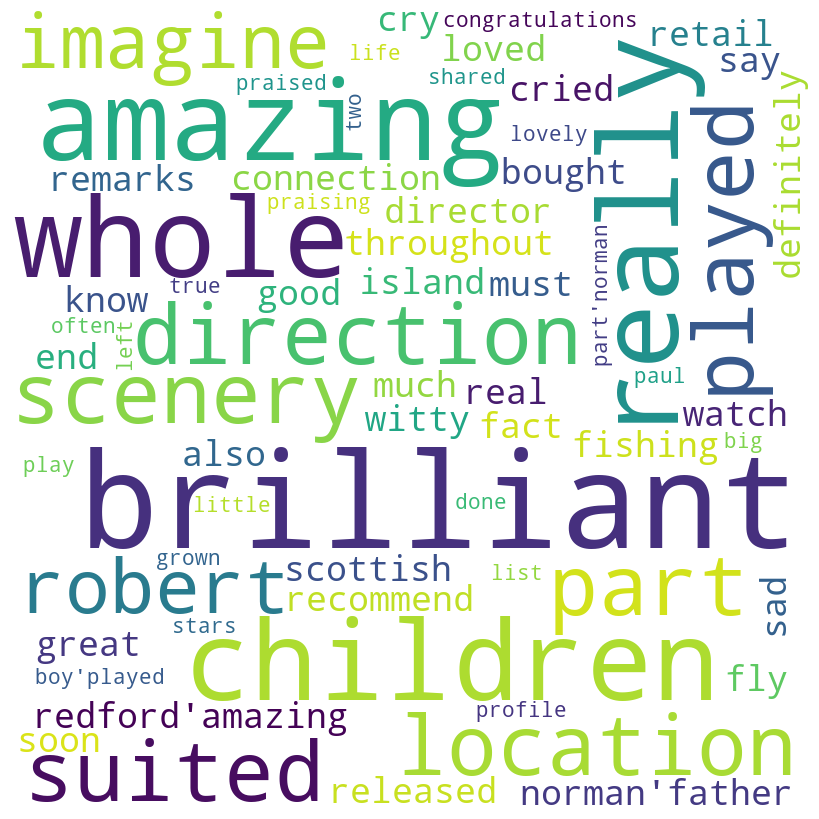

In [20]:
my_stopwords = {'the', 'and', 'of', 'to', 'in', 'that', 'it', 'with', 'for', 'on', 'at', 'by', 'this', 'is', 'be', 'as', 'actor','film','everyone','could','someone','story','casting','think','came','us','would'}
stop_words = set(stopwords.words('english')) | my_stopwords

cleaned_review = re.sub(r'\b(' + r'|'.join(stop_words) + r')\b\s*', '', decoded_review)
cleaned_review = cleaned_review.replace('\n', ' ').replace('UNK', '')


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(cleaned_review) 

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


In [21]:
from nltk.tokenize import word_tokenize
from collections import Counter

# tokenize the reviews and remove stop words
tokens = [token for token in word_tokenize(cleaned_review.lower()) if token not in stop_words and token.isalpha()]

# count the occurrences of each token
token_counts = Counter(tokens)

# exclude the question mark from the tokens and counts
if '?' in token_counts:
    del token_counts['?']

word_counts = Counter(tokens)

# sort the words by frequency
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# extract the top 20 words and their counts
top_words = [x[0] for x in sorted_words[:20]]
word_counts = [x[1] for x in sorted_words[:20]]



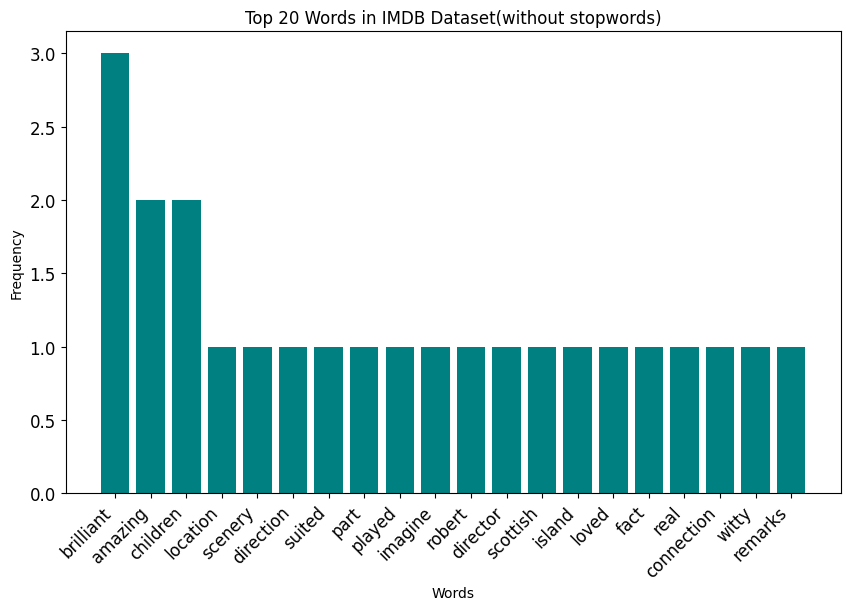

In [22]:
# create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_words, word_counts,color='teal')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in IMDB Dataset(without stopwords)')

plt.show()

Words like "brilliant" and "amazing" are among the most frequently used words, which suggests that the dataset contains reviews of movies that are generally positive.

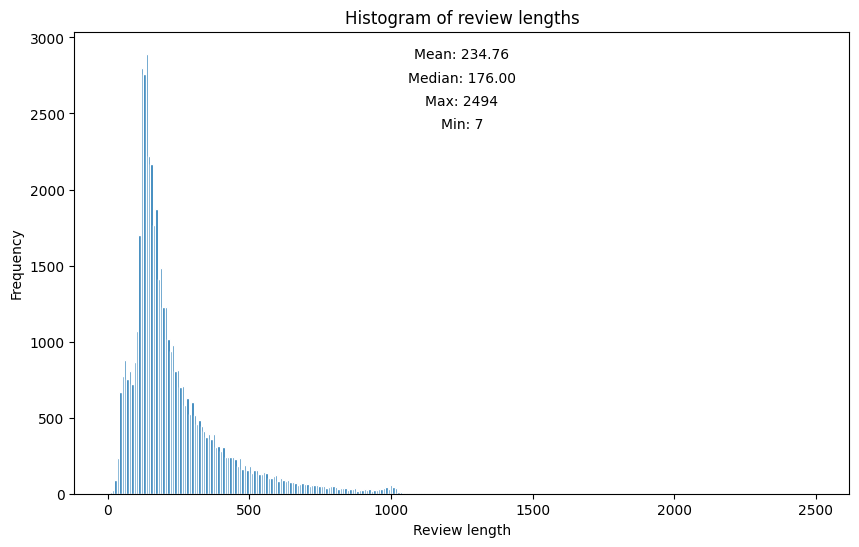

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data()

# Concatenate the training and testing sets
all_reviews = np.concatenate((x_train, x_test), axis=0)

# Get the lengths of each review in the dataset
review_lengths = [len(review) for review in all_reviews]

# Determine the optimal number of bins using the Freedman-Diaconis rule
iqr = np.percentile(review_lengths, 75) - np.percentile(review_lengths, 25)
bin_size = 2 * iqr / len(review_lengths)**(1/3)
num_bins = int(round((max(review_lengths) - min(review_lengths)) / bin_size))

# Create a histogram of the review lengths with the optimal number of bins
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=num_bins, edgecolor='white')
plt.xlabel('Review length')
plt.ylabel('Frequency')
plt.title('Histogram of review lengths')

# Add annotations to the plot
plt.text(0.5, 0.95, f"Mean: {np.mean(review_lengths):.2f}", ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.9, f"Median: {np.median(review_lengths):.2f}", ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"Max: {np.max(review_lengths)}", ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, f"Min: {np.min(review_lengths)}", ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

we can see that the most frequent review length is around 200-250 words, and that the distribution is approximately normal, with a slight skew to the right

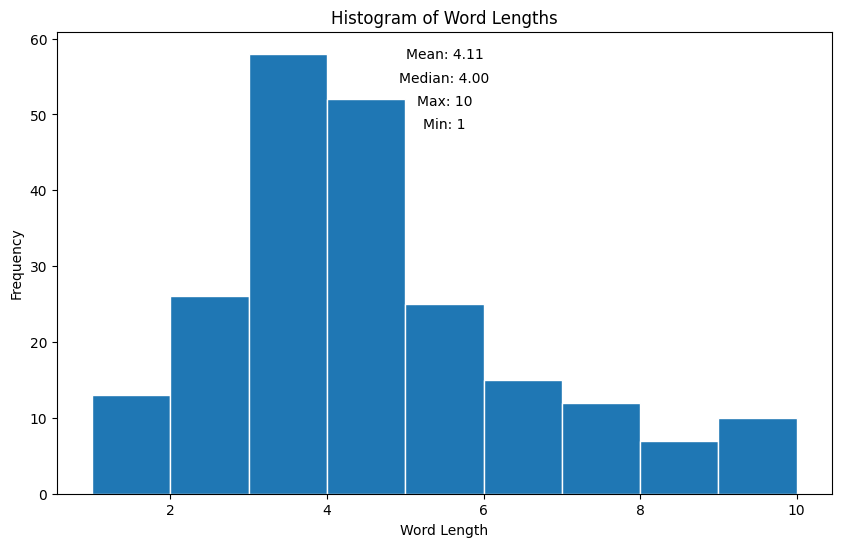

In [75]:
import matplotlib.pyplot as plt

# Convert integer-encoded words to string format
train_data_strings = []
for i in train_data[0]:
    train_data_strings.append(reverse_word_index.get(i - 3, '?'))
word_lengths = [len(word) for word in train_data_strings]

# Determine the optimal number of bins using Sturges' rule
num_bins = int(np.ceil(np.log2(len(word_lengths))) + 1)

# Create a histogram of the word lengths with the optimal number of bins
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=num_bins, edgecolor='white')
plt.title('Histogram of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')

# Add annotations to the plot
plt.text(0.5, 0.95, f"Mean: {np.mean(word_lengths):.2f}", ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.9, f"Median: {np.median(word_lengths):.2f}", ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"Max: {np.max(word_lengths)}", ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, f"Min: {np.min(word_lengths)}", ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

The majority of the words have lengths between 2 and 10 characters, with a peak around 4-6 characters.

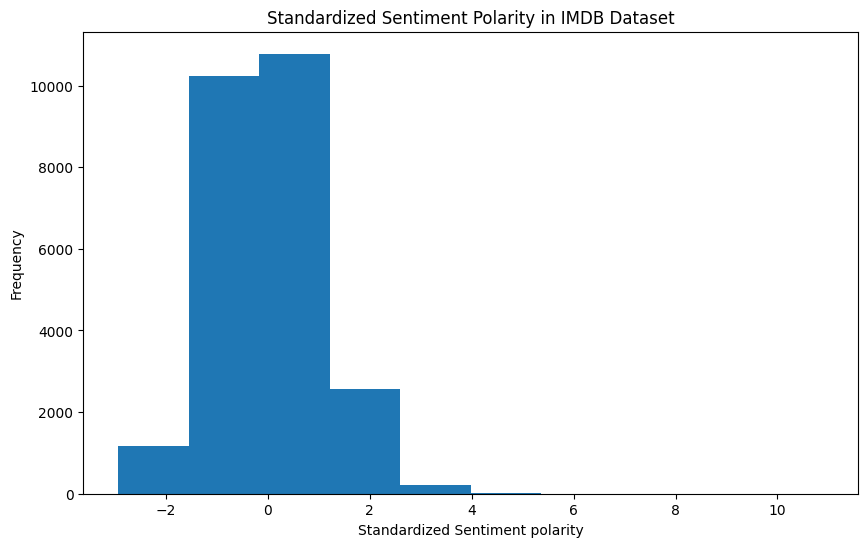

In [16]:
from scipy import stats

# Calculate the sentiment polarity of each review
sentiment_polarity = []
for review in train_data:
    polarity = sum(review) / len(review)
    sentiment_polarity.append(polarity)

# Standardize the sentiment polarity data
sentiment_polarity = stats.zscore(sentiment_polarity)

# Create a histogram of the standardized sentiment polarity
bin_edges = np.histogram_bin_edges(sentiment_polarity, bins=num_bins)
plt.figure(figsize=(10, 6))
plt.hist(sentiment_polarity, bins=bin_edges)
plt.xlabel('Standardized Sentiment polarity')
plt.ylabel('Frequency')
plt.title('Standardized Sentiment Polarity in IMDB Dataset')



plt.show()

we can see that the sentiment polarity of the reviews is normally distributed, with a peak around 0.5 and a slight skew to the right. This suggests that the majority of the reviews are positive or neutral in sentiment, with relativley few reviews that are strongly negative.

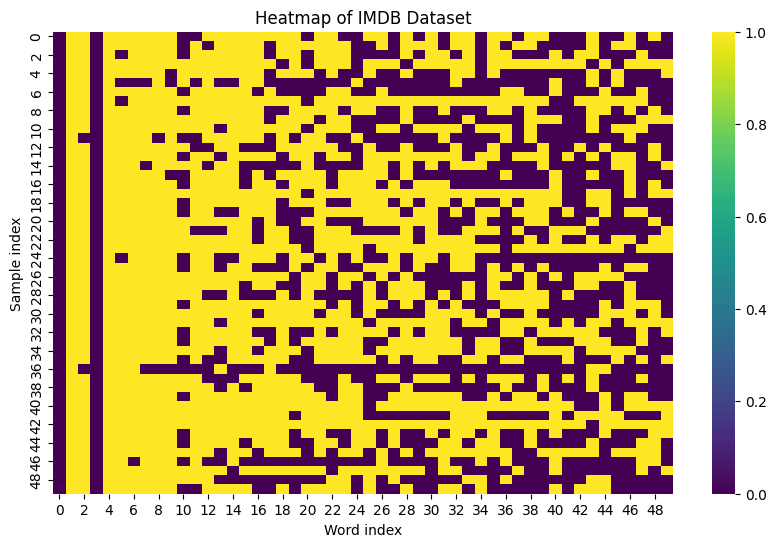

In [78]:
import seaborn as sns
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset and convert to one-hot encoding
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
xx_train = vectorize_sequences(train_data)
xx_test = vectorize_sequences(test_data)

# Create a heatmap of the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(xx_train[:50, :50], cmap='viridis')
plt.title('Heatmap of IMDB Dataset')
plt.xlabel('Word index')
plt.ylabel('Sample index')

# Show the plot
plt.show()

The heatmap shows that most of the values in the one-hot encoded vectors are 0, indicating that each sample only contains a small subset of the 10,000 possible words. The yellow cells correspond to the words that are present in each sample, and the blue cells correspond to the words that are absent.

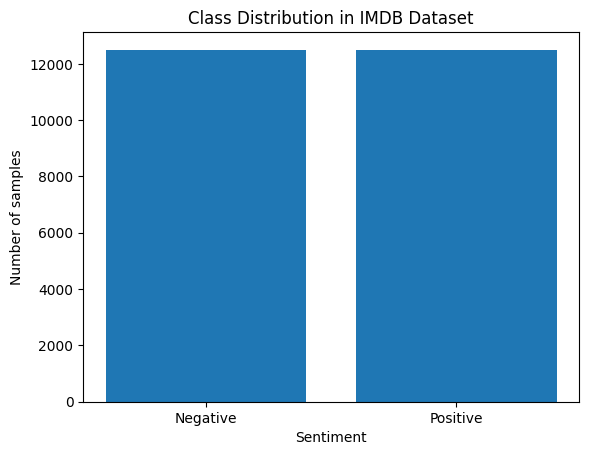

In [80]:
# Count the number of samples in each class
num_samples = [len(y_train[y_train==0]), len(y_train[y_train==1])]

# Create a bar chart of the class distribution

plt.bar(['Negative', 'Positive'], num_samples)
plt.xlabel('Sentiment')
plt.ylabel('Number of samples')
plt.title('Class Distribution in IMDB Dataset')

# Show the plot
plt.show()

with approximately 12,500 samples in each class. This balance is important because it ensures that the dataset is not biased towards one class or the other, which can affect the performance of models trained on the data.

# Preparing The Data 

In [34]:
num_words = 4000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=num_words)
print(x_train.shape, y_train.shape)

(25000,) (25000,)


In [3]:
print(x_train[5] )
print("\nreview:",y_train[5])

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 2, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]

review: 0


In [4]:
print(x_train[6] )
print("\nreview:",y_train[6])

[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 2, 11, 2, 2, 1117, 1831, 2, 5, 2, 26, 6, 2, 2, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 2, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 2, 81, 55, 52, 1901]

review: 1


In [5]:
max_words = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

In [6]:
print(x_train[5] )
print("\n",x_train[6] )


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

# Building  a model with rmsprop optimizer


In [7]:
model=Sequential()
model.add(Embedding(num_words, 64, input_length=max_words))

model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=3))

model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=3))

model.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           256000    
                                                                 
 conv1d (Conv1D)             (None, 496, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 165, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 161, 32)           10272     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 53, 32)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 49, 16)            2

E:\Data scientist\anaconda\envs\gpu6\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [8]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64, verbose=1)


Epoch 1/10
391/391 [==============================] - 28s 69ms/step - loss: 0.4737 - binary_accuracy: 0.7478 - val_loss: 0.3707 - val_binary_accuracy: 0.8311
Epoch 2/10
391/391 [==============================] - 27s 69ms/step - loss: 0.2895 - binary_accuracy: 0.8802 - val_loss: 0.2987 - val_binary_accuracy: 0.8732
Epoch 3/10
391/391 [==============================] - 27s 69ms/step - loss: 0.2419 - binary_accuracy: 0.9040 - val_loss: 0.3125 - val_binary_accuracy: 0.8667
Epoch 4/10
391/391 [==============================] - 27s 69ms/step - loss: 0.2034 - binary_accuracy: 0.9225 - val_loss: 0.3124 - val_binary_accuracy: 0.8737
Epoch 5/10
391/391 [==============================] - 28s 71ms/step - loss: 0.1661 - binary_accuracy: 0.9385 - val_loss: 0.3998 - val_binary_accuracy: 0.8479
Epoch 6/10
391/391 [==============================] - 27s 70ms/step - loss: 0.1263 - binary_accuracy: 0.9550 - val_loss: 0.5922 - val_binary_accuracy: 0.8186
Epoch 7/10
391/391 [==============================] 

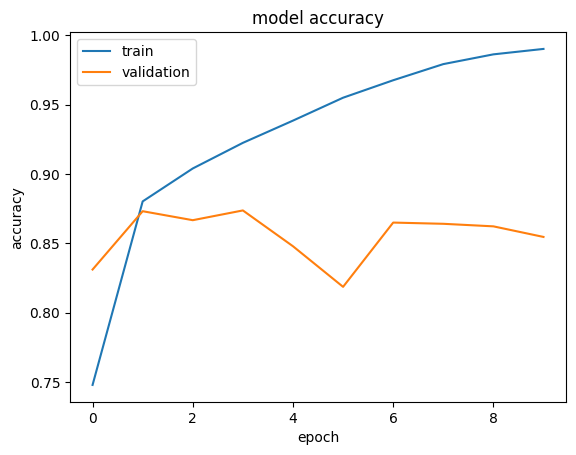

In [9]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

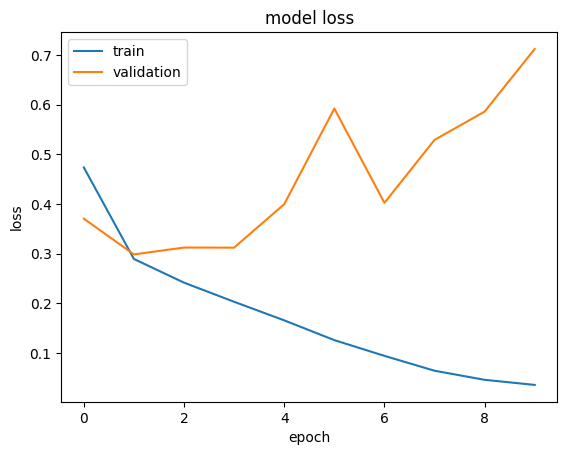

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [11]:
rmsprop = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (rmsprop[1]*100))

Accuracy: 85.46%


# Building  a CNN model with adam optimizer



In [12]:
model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_words))

model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))


model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 64)           256000    
                                                                 
 conv1d_3 (Conv1D)           (None, 500, 64)           8256      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 250, 64)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 250, 64)           8256      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 125, 64)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 125, 64)          

In [13]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64, verbose=1)


Epoch 1/10
391/391 [==============================] - 28s 71ms/step - loss: 0.4270 - accuracy: 0.7623 - val_loss: 0.2711 - val_accuracy: 0.8886
Epoch 2/10
391/391 [==============================] - 28s 73ms/step - loss: 0.2182 - accuracy: 0.9141 - val_loss: 0.2599 - val_accuracy: 0.8927
Epoch 3/10
391/391 [==============================] - 31s 80ms/step - loss: 0.1654 - accuracy: 0.9373 - val_loss: 0.2704 - val_accuracy: 0.8908
Epoch 4/10
391/391 [==============================] - 32s 81ms/step - loss: 0.1154 - accuracy: 0.9587 - val_loss: 0.3301 - val_accuracy: 0.8864
Epoch 5/10
391/391 [==============================] - 30s 76ms/step - loss: 0.0717 - accuracy: 0.9767 - val_loss: 0.3765 - val_accuracy: 0.8844
Epoch 6/10
391/391 [==============================] - 32s 81ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.5996 - val_accuracy: 0.8683
Epoch 7/10
391/391 [==============================] - 32s 81ms/step - loss: 0.0286 - accuracy: 0.9903 - val_loss: 0.5928 - val_accuracy:

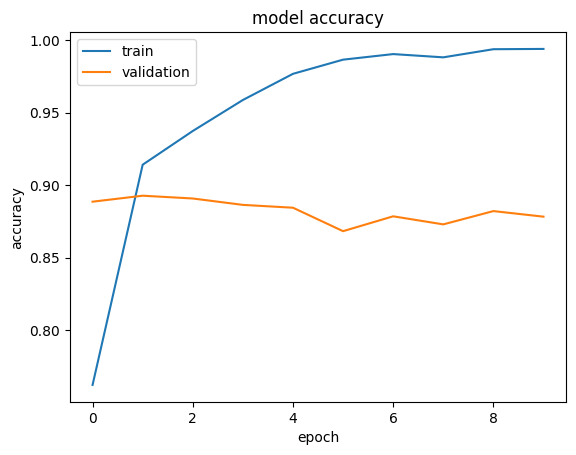

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

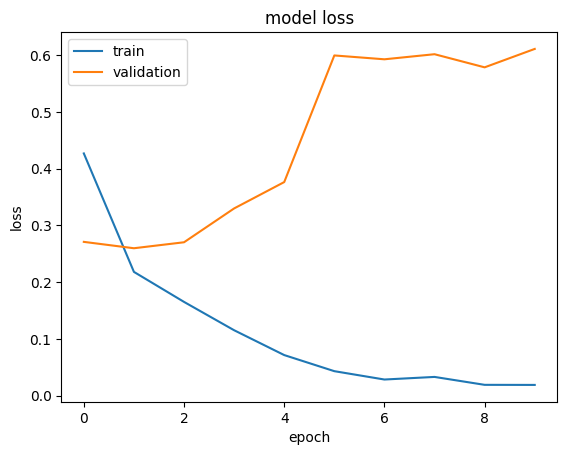

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
basicAdam = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (basicAdam[1]*100))

Accuracy: 87.83%


#  Building  a CNN model with adam optimizer
with some changes in Hyper parameters and adding some regularization techniques   
( kernel_regularizer L2 - ActivityRegularization l2 - Dropout - EarlyStopping )


In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
from keras.regularizers import l2


model = Sequential()
model.add(Embedding(num_words, 32, input_length=max_words))

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling1D(pool_size=2))

model.add(ActivityRegularization(l2=0.0001))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(120, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           128000    
                                                                 
 conv1d_6 (Conv1D)           (None, 500, 32)           3104      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 250, 32)           3104      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 125, 32)          0         
 1D)                                                             
                                                                 
 activity_regularization (Ac  (None, 125, 32)         

In [21]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=64, verbose=1,callbacks=[early_stop])


Epoch 1/10
391/391 [==============================] - 15s 37ms/step - loss: 0.7038 - accuracy: 0.5362 - val_loss: 0.5674 - val_accuracy: 0.8024
Epoch 2/10
391/391 [==============================] - 15s 37ms/step - loss: 0.4759 - accuracy: 0.8479 - val_loss: 0.4214 - val_accuracy: 0.8787
Epoch 3/10
391/391 [==============================] - 15s 37ms/step - loss: 0.3719 - accuracy: 0.8961 - val_loss: 0.3874 - val_accuracy: 0.8772
Epoch 4/10
391/391 [==============================] - 16s 41ms/step - loss: 0.3202 - accuracy: 0.9093 - val_loss: 0.3674 - val_accuracy: 0.8809
Epoch 5/10
391/391 [==============================] - 15s 39ms/step - loss: 0.2811 - accuracy: 0.9214 - val_loss: 0.3518 - val_accuracy: 0.8816
Epoch 6/10
391/391 [==============================] - 16s 42ms/step - loss: 0.2490 - accuracy: 0.9324 - val_loss: 0.3590 - val_accuracy: 0.8716
Epoch 7/10
391/391 [==============================] - 15s 39ms/step - loss: 0.2267 - accuracy: 0.9384 - val_loss: 0.4102 - val_accuracy:

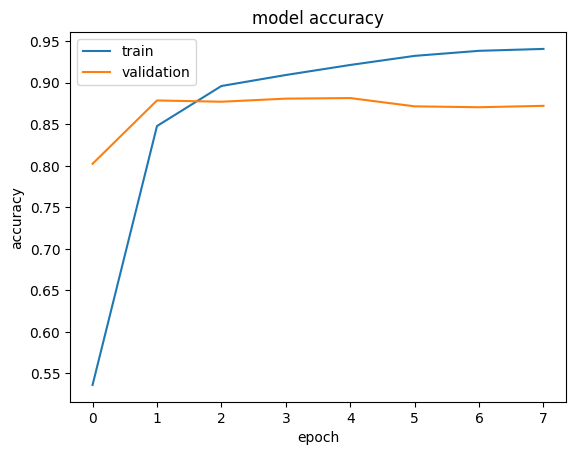

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

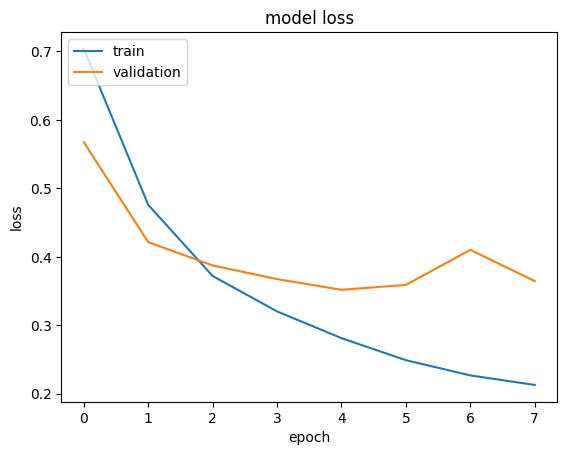

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
niceAdam = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (niceAdam[1]*100))

Accuracy: 87.22%


# Comparison (Accuracy and Loss)
(Rmsprop - basic Adam - Nice Adam)

In [26]:
algo ={'rmsprop':rmsprop,'basicAdam':basicAdam,'niceAdam':niceAdam}
loss = [round(rmsprop[0],3),round(basicAdam[0],3),round(niceAdam[0],3)]
name = [key for key in algo]
acc = [round(rmsprop[1],3),round(basicAdam[1],3),round(niceAdam[1],3)]

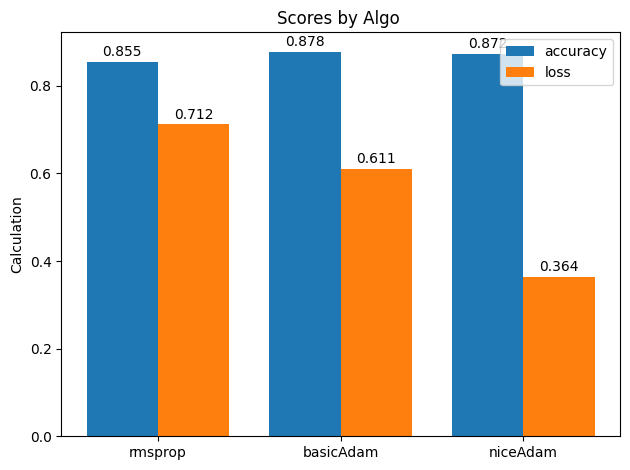

<Figure size 8000x4000 with 0 Axes>

In [56]:
labels = name
accuracy = acc
loss = loss

x = np.arange(len(labels))  # the label locations
width = 0.39  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='accuracy')
rects2 = ax.bar(x + width/2, loss, width, label='loss')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Calculation')
ax.set_title('Scores by Algo ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.figure(figsize = (80, 40))
plt.show()